In [1]:
import pandas as pd 
import numpy as np

In [2]:
data = pd.read_csv(r"/Users/vamsi/Downloads/diminos_data.csv")

In [3]:
data

,order_id,order_placed_at,order_delivered_at
0,1523111,2023-03-01 00:00:59,2023-03-01 00:18:07.443132
1,1523112,2023-03-01 00:03:59,2023-03-01 00:19:34.925241
2,1523113,2023-03-01 00:07:22,2023-03-01 00:22:28.291385
3,1523114,2023-03-01 00:07:47,2023-03-01 00:46:19.019399
4,1523115,2023-03-01 00:09:03,2023-03-01 00:25:13.619056
...,...,...,...
14995,1538106,2023-03-27 23:37:05,2023-03-27 23:52:37.409378
14996,1538107,2023-03-27 23:47:38,2023-03-28 00:04:22.672912
14997,1538108,2023-03-27 23:50:16,2023-03-28 00:05:40.676238
14998,1538109,2023-03-27 23:52:44,2023-03-28 00:08:41.810358


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            15000 non-null  int64 
 1   order_placed_at     15000 non-null  object
 2   order_delivered_at  15000 non-null  object
dtypes: int64(1), object(2)
memory usage: 351.7+ KB


In [5]:
data[['order_placed_at']] = pd.DataFrame(pd.to_datetime(data['order_placed_at']))
data[['order_delivered_at']] = pd.DataFrame(pd.to_datetime(data['order_delivered_at']))

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   order_id            15000 non-null  int64         
 1   order_placed_at     15000 non-null  datetime64[ns]
 2   order_delivered_at  15000 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1)
memory usage: 351.7 KB


In [7]:
data[['ordered_day']] = pd.DataFrame(data['order_placed_at'].dt.day_name())
data[['delivered_day']] = pd.DataFrame(data['order_delivered_at'].dt.day_name())

In [8]:
data

,order_id,order_placed_at,order_delivered_at,ordered_day,delivered_day
0,1523111,2023-03-01 00:00:59,2023-03-01 00:18:07.443132,Wednesday,Wednesday
1,1523112,2023-03-01 00:03:59,2023-03-01 00:19:34.925241,Wednesday,Wednesday
2,1523113,2023-03-01 00:07:22,2023-03-01 00:22:28.291385,Wednesday,Wednesday
3,1523114,2023-03-01 00:07:47,2023-03-01 00:46:19.019399,Wednesday,Wednesday
4,1523115,2023-03-01 00:09:03,2023-03-01 00:25:13.619056,Wednesday,Wednesday
...,...,...,...,...,...
14995,1538106,2023-03-27 23:37:05,2023-03-27 23:52:37.409378,Monday,Monday
14996,1538107,2023-03-27 23:47:38,2023-03-28 00:04:22.672912,Monday,Tuesday
14997,1538108,2023-03-27 23:50:16,2023-03-28 00:05:40.676238,Monday,Tuesday
14998,1538109,2023-03-27 23:52:44,2023-03-28 00:08:41.810358,Monday,Tuesday


<AxesSubplot:>

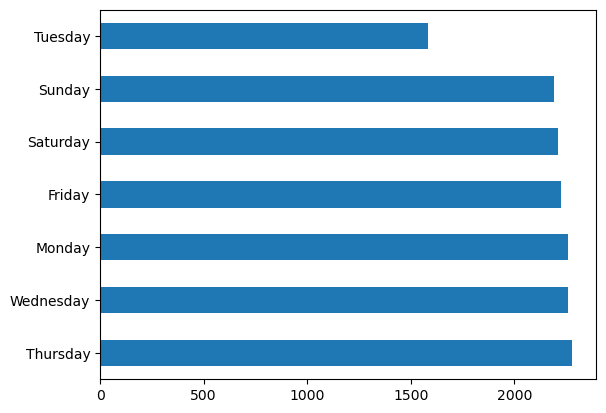

In [49]:
data['ordered_day'].value_counts().plot(kind='barh')

In [10]:
data[['time_taken']] = pd.DataFrame(pd.to_timedelta(data['order_delivered_at'] - data['order_placed_at']))

In [11]:
days = [ ]
hours = [ ]
minutes = [ ]
time = []
date = []
for i in range(len(data)):
    days.append(data['time_taken'][i].components.days)
    hours.append(data['time_taken'][i].components.hours)
    minutes.append(data['time_taken'][i].components.minutes)
    time.append(data['order_placed_at'][i].hour)
    date.append(data['order_placed_at'][i].day)

In [12]:
data[['days']]= pd.DataFrame(days)
data[['hours']]= pd.DataFrame(hours)
data[['minutes']]= pd.DataFrame(minutes)
data[['time_of_order']] = pd.DataFrame(time)
data[['date']] = pd.DataFrame(date)

<AxesSubplot:title={'center':'late deliveries day wise'}>

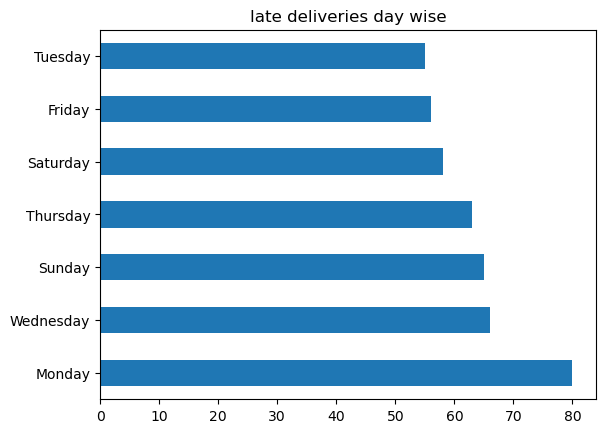

In [13]:
data[(data['days']>1) | (data['hours']>1) | (data['minutes']>31)]['ordered_day'].value_counts().plot(kind='barh',title='late deliveries day wise')

In [14]:
data[(data['days']>1)]

,order_id,order_placed_at,order_delivered_at,ordered_day,delivered_day,time_taken,days,hours,minutes,time_of_order,date
4165,1527276,2023-03-08 09:46:43,2023-03-12 11:34:09.085175,Wednesday,Sunday,4 days 01:47:26.085175,4,1,47,9,8
5499,1528610,2023-03-10 17:06:22,2023-03-15 18:46:11.882496,Friday,Wednesday,5 days 01:39:49.882496,5,1,39,17,10
10007,1533118,2023-03-19 00:56:34,2023-03-21 00:59:41.454974,Sunday,Tuesday,2 days 00:03:07.454974,2,0,3,0,19
10225,1533336,2023-03-19 11:07:32,2023-03-22 13:53:25.472592,Sunday,Wednesday,3 days 02:45:53.472592,3,2,45,11,19
14155,1537266,2023-03-26 09:54:24,2023-03-29 02:42:50.645252,Sunday,Wednesday,2 days 16:48:26.645252,2,16,48,9,26


In [15]:
data[data['time_taken']==data['time_taken'].min()]

,order_id,order_placed_at,order_delivered_at,ordered_day,delivered_day,time_taken,days,hours,minutes,time_of_order,date
4645,1527756,2023-03-09 05:46:55,2023-03-09 06:01:55.000620,Thursday,Thursday,0 days 00:15:00.000620,0,0,15,5,9


## all the orders day wise

## FOR MONDAY

<AxesSubplot:>

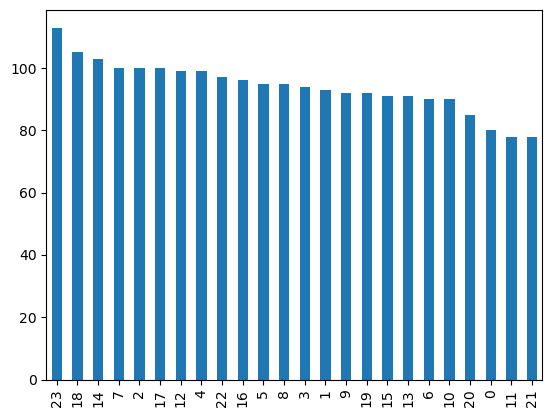

In [16]:
data[data['ordered_day']=='Monday']['time_of_order'].value_counts().plot(kind='bar')


## FOR TUESDAY

<AxesSubplot:>

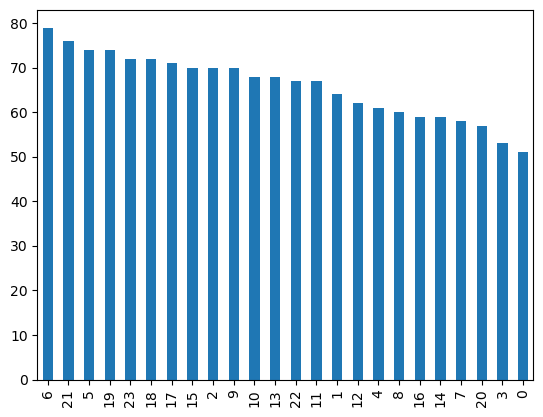

In [17]:
data[data['ordered_day']=='Tuesday']['time_of_order'].value_counts().plot(kind='bar')

## FOR WEDNESDAY

<AxesSubplot:>

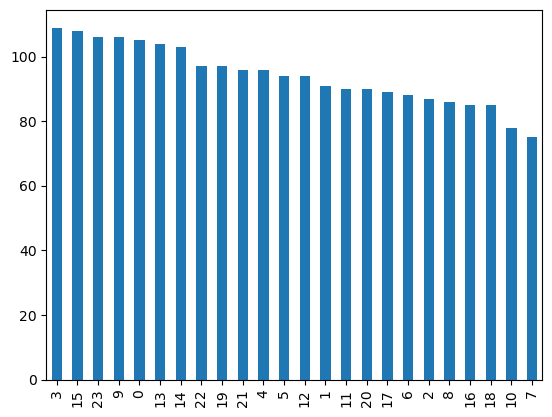

In [18]:
data[data['ordered_day']=='Wednesday']['time_of_order'].value_counts().plot(kind='bar')

## FOR THURSDAY

<AxesSubplot:>

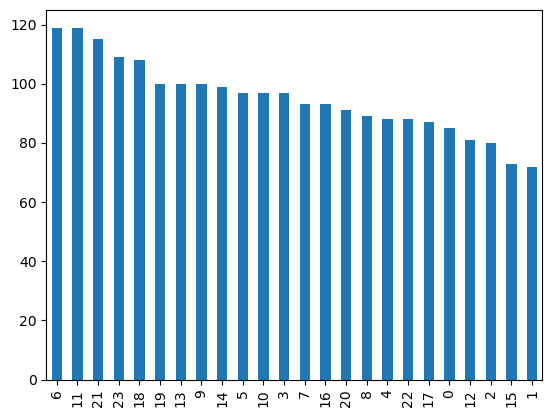

In [19]:
data[data['ordered_day']=='Thursday']['time_of_order'].value_counts().plot(kind='bar')

## FOR  FRIDAY

<AxesSubplot:>

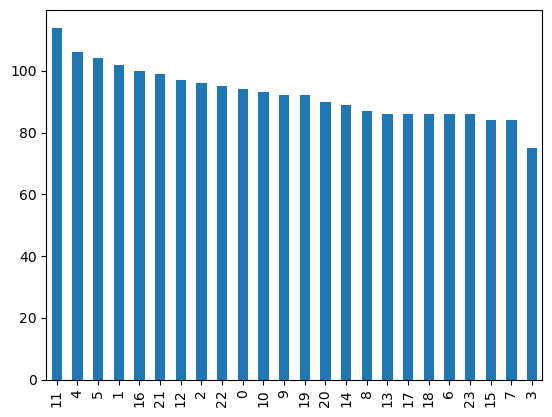

In [20]:
data[data['ordered_day']=='Friday']['time_of_order'].value_counts().plot(kind='bar')

## FOR SATURDAY

<AxesSubplot:>

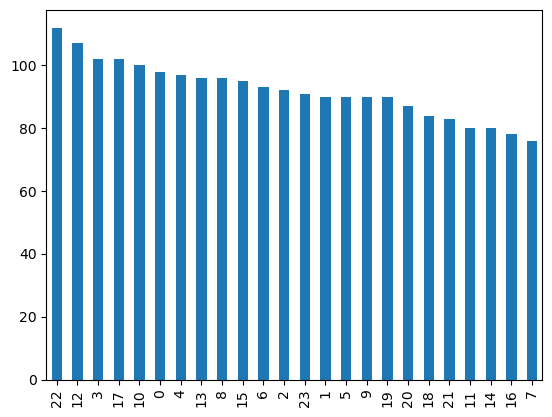

In [21]:
data[data['ordered_day']=='Saturday']['time_of_order'].value_counts().plot(kind='bar')

## FOR SUNDAY

<AxesSubplot:>

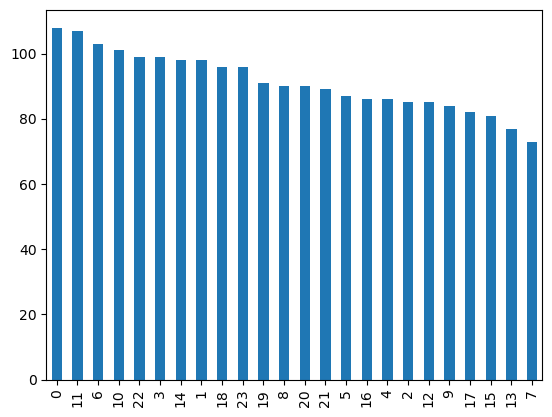

In [22]:
data[data['ordered_day']=='Sunday']['time_of_order'].value_counts().plot(kind='bar')

In [23]:
data[data['date']==1]

,order_id,order_placed_at,order_delivered_at,ordered_day,delivered_day,time_taken,days,hours,minutes,time_of_order,date
0,1523111,2023-03-01 00:00:59,2023-03-01 00:18:07.443132,Wednesday,Wednesday,0 days 00:17:08.443132,0,0,17,0,1
1,1523112,2023-03-01 00:03:59,2023-03-01 00:19:34.925241,Wednesday,Wednesday,0 days 00:15:35.925241,0,0,15,0,1
2,1523113,2023-03-01 00:07:22,2023-03-01 00:22:28.291385,Wednesday,Wednesday,0 days 00:15:06.291385,0,0,15,0,1
3,1523114,2023-03-01 00:07:47,2023-03-01 00:46:19.019399,Wednesday,Wednesday,0 days 00:38:32.019399,0,0,38,0,1
4,1523115,2023-03-01 00:09:03,2023-03-01 00:25:13.619056,Wednesday,Wednesday,0 days 00:16:10.619056,0,0,16,0,1
...,...,...,...,...,...,...,...,...,...,...,...
545,1523656,2023-03-01 23:42:11,2023-03-01 23:57:28.388495,Wednesday,Wednesday,0 days 00:15:17.388495,0,0,15,23,1
546,1523657,2023-03-01 23:43:12,2023-03-01 23:58:21.655915,Wednesday,Wednesday,0 days 00:15:09.655915,0,0,15,23,1
547,1523658,2023-03-01 23:44:48,2023-03-02 00:00:00.698796,Wednesday,Thursday,0 days 00:15:12.698796,0,0,15,23,1
548,1523659,2023-03-01 23:51:55,2023-03-02 00:07:00.605100,Wednesday,Thursday,0 days 00:15:05.605100,0,0,15,23,1


* NEAR BY 550 ORDERS ARE PLACED IN DAY 01.

In [41]:
#highest deliveries
for i in ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']:
    print(i,data[data['ordered_day']==i]['date'].value_counts().max())

Monday 597
Tuesday 570
Wednesday 591
Thursday 588
Friday 587
Saturday 567
Sunday 582


* in each days the maximum order (or) highest deliveries are these

<AxesSubplot:>

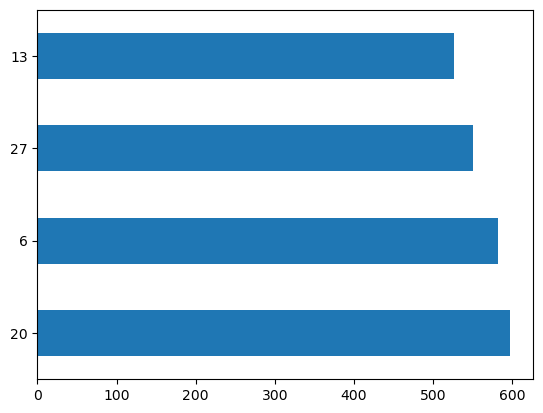

In [46]:
data[data['ordered_day']=='Monday']['date'].value_counts().plot(kind='barh')

* FOR MONDAY DEFFERENT DATE IN MONDAY